In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.corpus import stopwords

In [2]:
doc=pd.read_csv("Spam Email Detection - spam.csv")

In [3]:
doc.shape

(5572, 5)

In [4]:
doc.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data cleaning

In [5]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
doc.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
doc.sample(5)

,v1,v2
149,ham,Sindu got job in birla soft ..
4028,ham,"[��_] anyway, many good evenings to u! s"
2411,ham,"Come to me right now, Ahmad"
4120,ham,Yunny... I'm goin to be late
5318,ham,"Good morning, my Love ... I go to sleep now an..."


In [8]:
doc.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
doc

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
encoder=LabelEncoder()
doc['Target']=encoder.fit_transform(doc['Target'])


In [10]:
doc.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
doc.isnull().sum()

Target    0
Text      0
dtype: int64

In [151]:
doc.duplicated().sum()

0

In [13]:
doc=doc.drop_duplicates(keep='first')

In [14]:
doc.duplicated().sum()

0

## EDA

In [15]:
doc['Target'].value_counts()

0    4516
1     647
Name: Target, dtype: int64

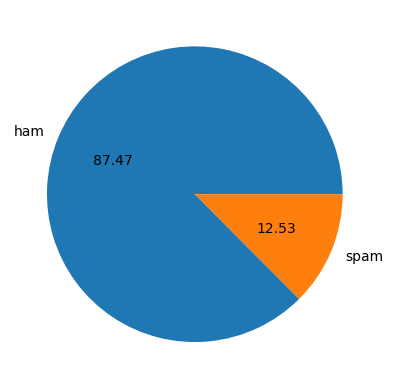

In [16]:
plt.pie(doc['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
import nltk   #natural language toolkit

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91836\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
doc['num_characters']=doc['Text'].apply(len)

C:\Users\91836\AppData\Local\Temp\ipykernel_5968\623586365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc['num_characters']=doc['Text'].apply(len)


In [20]:
doc.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# num of words
doc['num_words']=doc['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\91836\AppData\Local\Temp\ipykernel_5968\237377951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc['num_words']=doc['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [22]:
doc.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
doc['Num_sentences']=doc['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\91836\AppData\Local\Temp\ipykernel_5968\1240602701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc['Num_sentences']=doc['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [24]:
doc.head()

,Target,Text,num_characters,num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
#plotting histogram
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

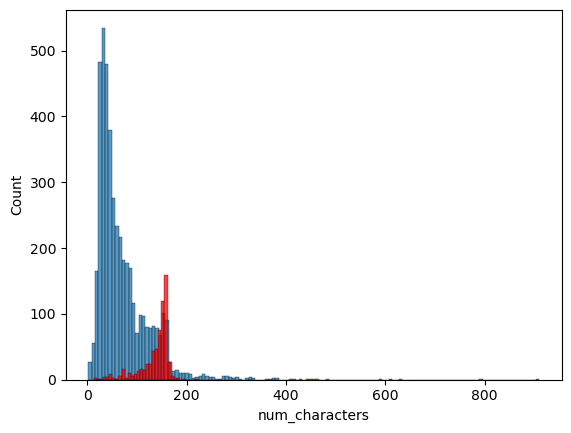

In [26]:
sns.histplot(doc[doc['Target']==0]['num_characters'])
sns.histplot(doc[doc['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

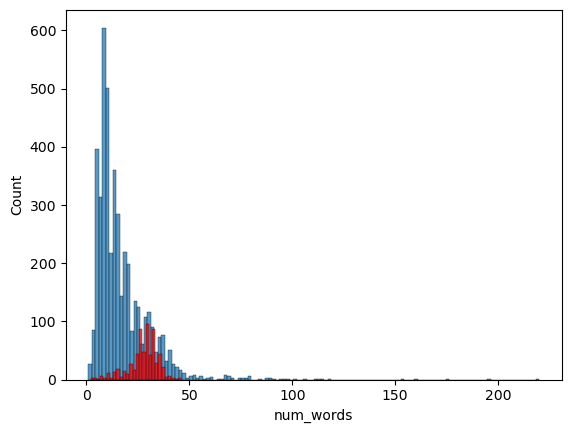

In [27]:
sns.histplot(doc[doc['Target']==0]['num_words'])
sns.histplot(doc[doc['Target']==1]['num_words'],color='red')

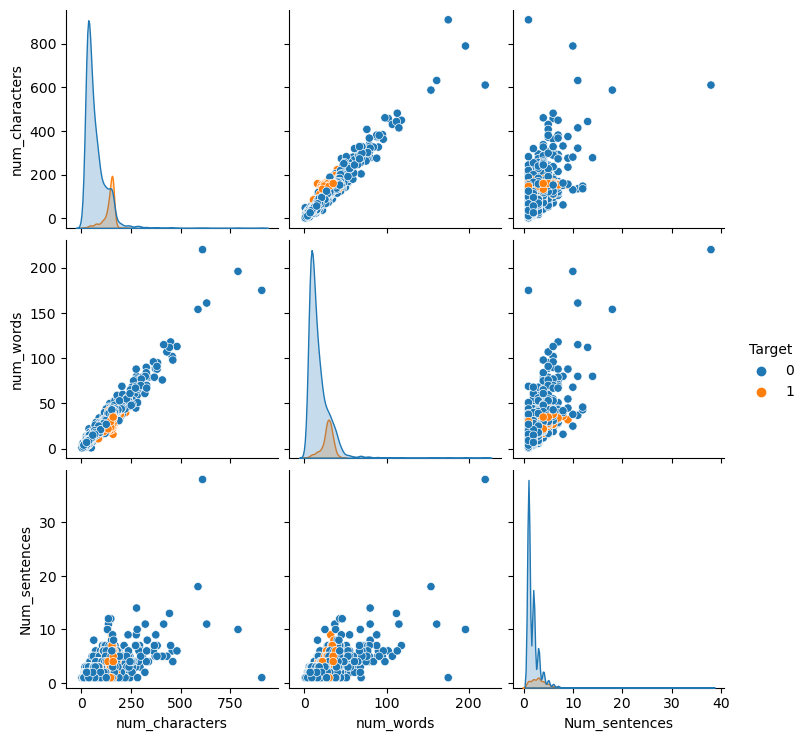

In [28]:
sns.pairplot(doc,hue='Target')

C:\Users\91836\AppData\Local\Temp\ipykernel_5968\3260030190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(doc.corr(),annot=True)


<Axes: >

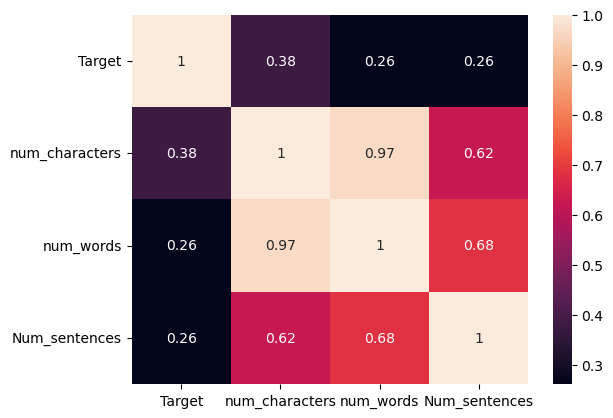

In [29]:
sns.heatmap(doc.corr(),annot=True)

## Data Preprocessing

In [30]:
def transform_text(text):
    text=text.lower()      #text lower
    text=nltk.word_tokenize(text)     #tokenization of text
    
    y=[]
    for i in text:
        if i.isalnum():    #only fetches alphanumeric character
            y.append(i)
        
    text=y[:]
    y.clear()
    for i in text:     #removes stopwords and punctuations from text
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:   #apply stemming on text
        y.append(ps.stem(i))
    return " ".join(y)

In [33]:
transform_text('HI HOW ARE 22@ YOU. This is a good dancing style that i learned from you.')

'hi 22 good danc style learn'

In [34]:
ps.stem('dancing')

'danc'

In [35]:
doc['transformed_sentence']=doc['Text'].apply(transform_text)

C:\Users\91836\AppData\Local\Temp\ipykernel_5968\1744526529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc['transformed_sentence']=doc['Text'].apply(transform_text)


In [36]:
doc.head()

,Target,Text,num_characters,num_words,Num_sentences,transformed_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [39]:
spam_wc=wc.generate(doc[doc['Target']==1]['transformed_sentence'].str.cat(sep=" "))

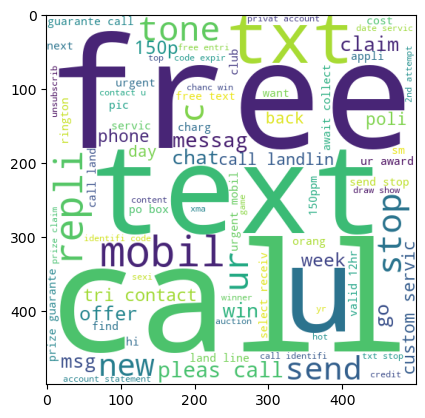

In [40]:
plt.imshow(spam_wc)

In [41]:
ham_wc=wc.generate(doc[doc['Target']==0]['transformed_sentence'].str.cat(sep=" "))

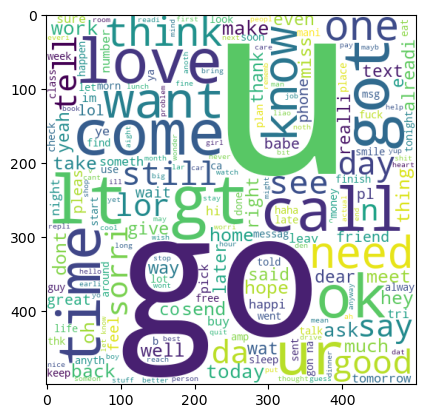

In [42]:
plt.imshow(ham_wc)

In [43]:
doc.head()

,Target,Text,num_characters,num_words,Num_sentences,transformed_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
spam_corpus=[]
for msg in doc[doc['Target']==1]['transformed_sentence'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [45]:
len(spam_corpus)

9861

<Axes: xlabel='0', ylabel='1'>

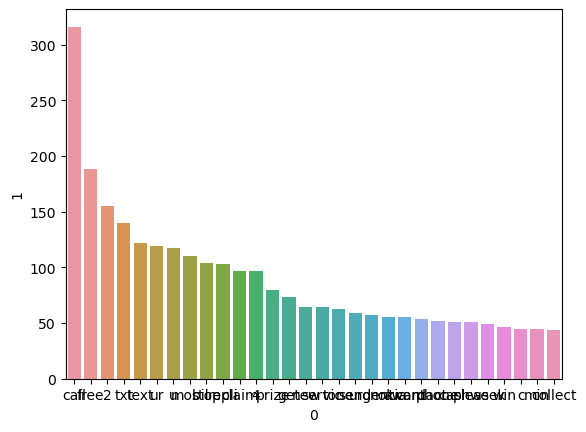

In [46]:
from collections import Counter
# Counter(spam_corpus)
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


In [47]:
ham_corpus=[]
for msg in doc[doc['Target']==0]['transformed_sentence'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

In [48]:
len(ham_corpus)

35306

<Axes: xlabel='0', ylabel='1'>

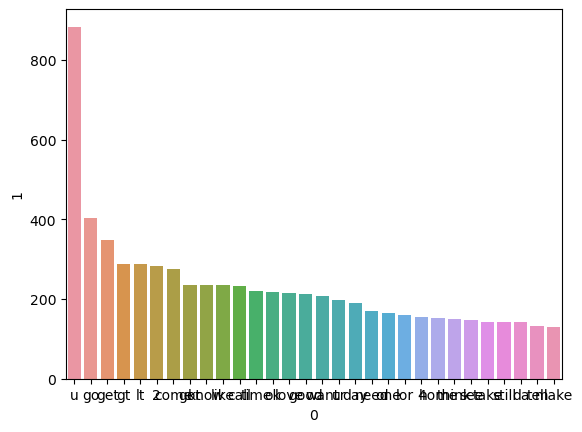

In [49]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])


## Model building

In [137]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfid=TfidfVectorizer(max_features=3000)

In [138]:
# we need to convert text in numeric form that is vector form 
X=tfid.fit_transform(doc['transformed_sentence']).toarray()

In [139]:
X.shape #email and words

(5163, 3000)

In [140]:
Y=doc['Target'].values

In [141]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [142]:
Y.shape

(5163,)

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [145]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [146]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [147]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.861568247821878
[[784 128]
 [ 15 106]]
0.452991452991453


In [148]:
mnb.fit(x_train,y_train)   #best suits as precision is 100%
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9719264278799613
[[911   1]
 [ 28  93]]
0.9893617021276596


In [149]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.978702807357212
[[909   3]
 [ 19 102]]
0.9714285714285714


In [63]:
#tfid-mnb

In [150]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))